In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this block of code, two key features of the thermal and RGB images are calculated: the mean and variance of pixel intensity. These metrics are important for understanding the distribution and variability of information within the images.

*   Mean intensity: The mean (or average) intensity of the pixels in an image gives
an idea of the overall temperature level (in the case of thermal images) or brightness (in the case of RGB images). For thermal images, a high mean would indicate a globally high temperature, while a low mean suggests lower temperatures across the scene.
*   Variance of intensity: Variance measures the spread of pixel intensity values relative to the mean. In simple terms, it tells us how much the pixel values vary compared to the average value. A high variance means there is significant variability in the temperatures or brightness within the image, while a low variance suggests more uniform intensity values.

These metrics are useful for characterizing the image and can be used to compare different types of images (such as thermal vs. RGB) or to detect patterns or anomalies within the images. In this case, the mean and variance will be used to perform a separability analysis between the thermal and RGB classes, helping us determine how distinguishable these two classes are in terms of their statistical features.

In [12]:
import os
import cv2
import pandas as pd

image_folder = '/content/drive/MyDrive/Programacion Cientifica/Database'

def extract_image_features(folder):
    data = []
    for file in os.listdir(folder):
        if file.endswith('_thermal.jpg'):
            thermal_path = os.path.join(folder, file)
            rgb_path = os.path.join(folder, file.replace('_thermal', '_rgb'))
            if os.path.exists(rgb_path):

                thermal_img = cv2.imread(thermal_path, cv2.IMREAD_GRAYSCALE)
                rgb_img = cv2.imread(rgb_path, cv2.IMREAD_GRAYSCALE)


                thermal_mean = thermal_img.mean()
                thermal_var = thermal_img.var()
                rgb_mean = rgb_img.mean()
                rgb_var = rgb_img.var()


                data.append({'ID': file.split('_')[0], 'Class': 'Thermal',
                             'Mean': thermal_mean, 'Variance': thermal_var})
                data.append({'ID': file.split('_')[0], 'Class': 'RGB',
                             'Mean': rgb_mean, 'Variance': rgb_var})
    return pd.DataFrame(data)

df = extract_image_features(image_folder)
print(df.head())


  ID    Class        Mean     Variance
0  2  Thermal   55.077799  2348.091669
1  2      RGB  120.622406  1246.383318
2  3  Thermal   39.587773  1268.410265
3  3      RGB  118.329134  2029.005603
4  4  Thermal   30.137904  1313.286308


In this block, we are performing two key preprocessing steps on the data: handling missing values and normalizing the features.

**Dropping missing values:** The dropna() function is used to remove any rows with missing values (NaN) from the dataset. This ensures that the analysis is conducted only on complete data, avoiding any potential issues that could arise from incomplete observations.

**Normalization** (Z-score transformation): For each of the columns 'Mean' and 'Variance', the data is normalized by applying a Z-score transformation. This process rescales the data to have a mean of 0 and a standard deviation of 1, which allows for better comparison between features and helps to prevent one feature from dominating others due to different scales. The Z-score is calculated as (x - mean) / std, where x is each data point, mean is the mean of the data in the group, and std is the standard deviation of that group.

In [15]:

df.dropna(inplace=True)

for col in ['Mean', 'Variance']:
    df[col] = df.groupby('Class')[col].transform(lambda x: (x - x.mean()) / x.std())

print(df.describe())


               Mean      Variance
count  2.400000e+01  2.400000e+01
mean  -4.255855e-16  4.996004e-16
std    9.780193e-01  9.780193e-01
min   -2.147090e+00 -1.368120e+00
25%   -4.541722e-01 -7.769610e-01
50%   -3.278743e-02 -1.865460e-01
75%    5.723825e-01  7.346117e-01
max    2.274339e+00  2.125877e+00


After performing the Z-score normalization, the results show the descriptive statistics for the 'Mean' and 'Variance' columns for both thermal and RGB images.


1.   Mean: The mean values of 'Mean' and 'Variance' are close to 0, indicating effective normalization. For thermal images, the mean represents the average temperature detected by the sensor. A higher mean indicates warmer areas, while a lower mean suggests cooler zones.
2.   Standard deviation: Both features have a standard deviation close to 1, which is typical for normalized data. This means that the values are well-scaled, making comparisons across different image classes easier. For thermal images, this shows that thermal intensities are distributed evenly.
lemento de la lista

3. Range (min and max): The data ranges from negative to positive values, indicating areas with temperatures both below and above the average. For thermal images, this reflects regions with cooler and hotter temperatures, which are important for detecting anomalies.

4. Quartiles: The 25%, 50%, and 75% percentiles help identify how thermal intensities and variance are distributed. The 25% quartile represents cooler areas, while the 75% quartile corresponds to hotter regions.

These statistics provide a clear understanding of the distribution of thermal intensities in the images, which is essential for further analysis of thermal behavior.

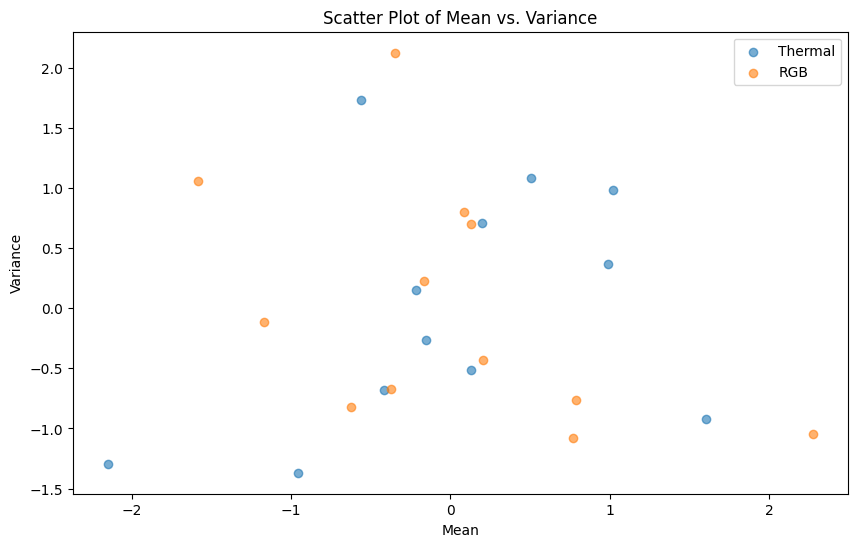

<Figure size 1000x600 with 0 Axes>

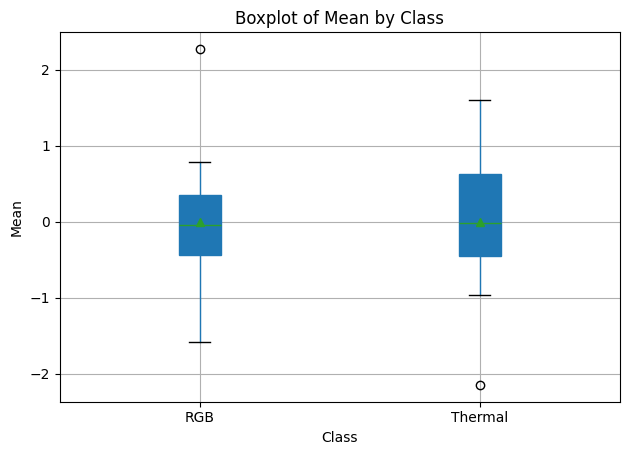

<Figure size 1000x600 with 0 Axes>

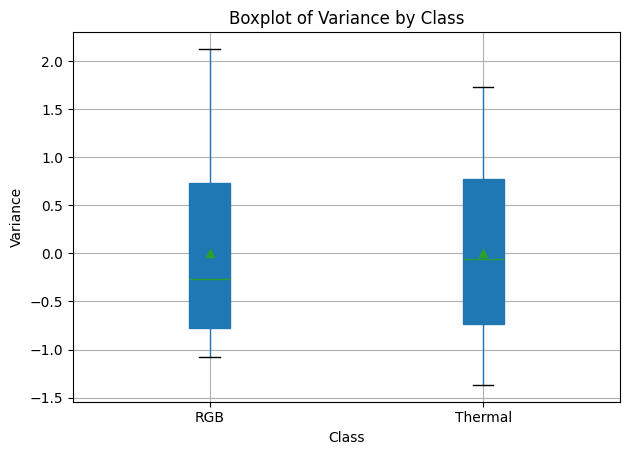

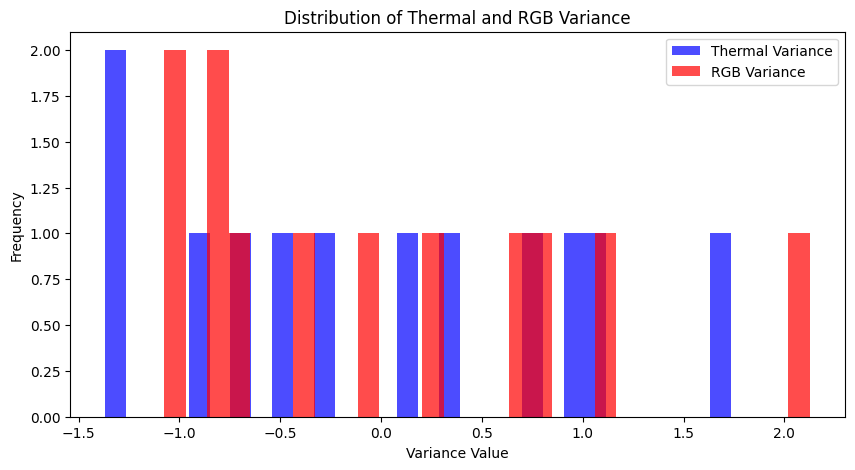

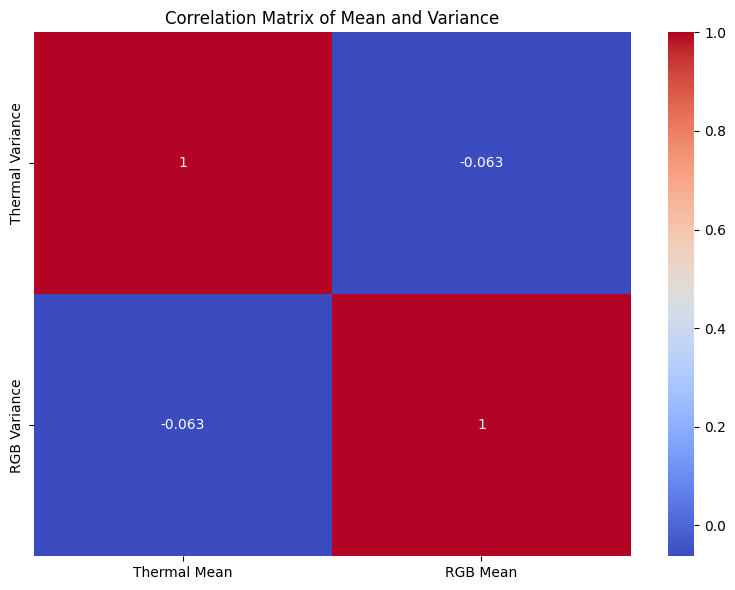

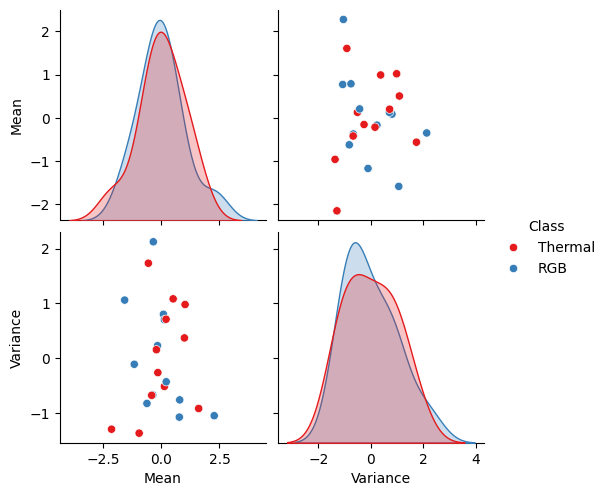

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['Mean'], subset['Variance'], label=label, alpha=0.6)
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.title('Scatter Plot of Mean vs. Variance')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column='Mean', by='Class', patch_artist=True, showmeans=True)
plt.title('Boxplot of Mean by Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column='Variance', by='Class', patch_artist=True, showmeans=True)
plt.title('Boxplot of Variance by Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df[df['Class'] == 'Thermal']['Variance'].plot(kind='hist', bins=30, alpha=0.7, label='Thermal Variance', color='blue')
df[df['Class'] == 'RGB']['Variance'].plot(kind='hist', bins=30, alpha=0.7, label='RGB Variance', color='red')
plt.legend()
plt.title("Distribution of Thermal and RGB Variance")
plt.xlabel("Variance Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
thermal_mean = df[df['Class'] == 'Thermal']['Mean']
rgb_mean = df[df['Class'] == 'RGB']['Mean']
thermal_variance = df[df['Class'] == 'Thermal']['Variance']
rgb_variance = df[df['Class'] == 'RGB']['Variance']

corr_matrix = np.corrcoef(np.concatenate([thermal_mean, rgb_mean]), np.concatenate([thermal_variance, rgb_variance]))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['Thermal Mean', 'RGB Mean'], yticklabels=['Thermal Variance', 'RGB Variance'])
plt.title("Correlation Matrix of Mean and Variance")
plt.tight_layout()
plt.show()

sns.pairplot(df, hue="Class", vars=["Mean", "Variance"], palette="Set1")
plt.show()


In this block, we will prepare the data by encoding the 'Class' column into numerical labels for the logistic regression model. Using the 'Mean' and 'Variance' features, we will train the model and evaluate its performance through several metrics, including the AUC score, accuracy, and confusion matrix. Additionally, we will calculate the Fisher Discriminant Ratio to assess the separability between thermal and RGB images. A t-test will be conducted to examine if the mean 'Mean' values significantly differ between the two classes. Finally, visualizations will be created to show the distribution of 'Mean' values and the relationship between 'Mean' and 'Variance' for both thermal and RGB images, providing a comprehensive view of the model’s effectiveness and the statistical properties of the dataset.

Fisher Discriminant Ratio: 4.279844320860523e-31


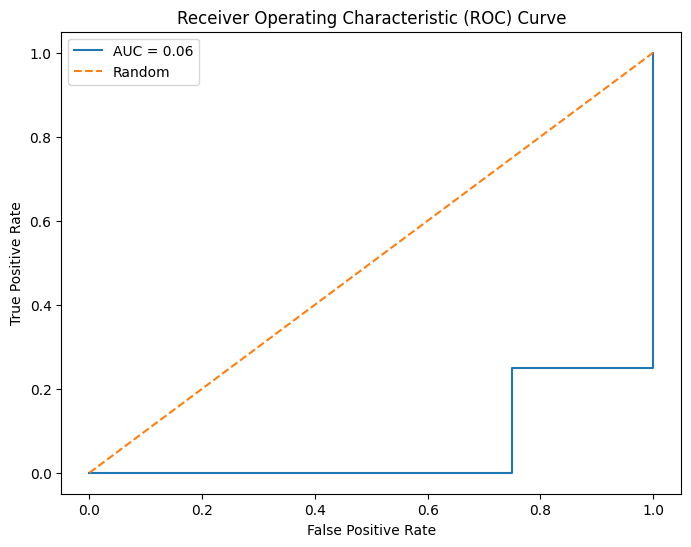

AUC Score: 0.0625
T-statistic: 2.266233259184197e-15
P-value: 0.9999999999999982
Accuracy: 0.25
Confusion Matrix:
[[0 4]
 [2 2]]


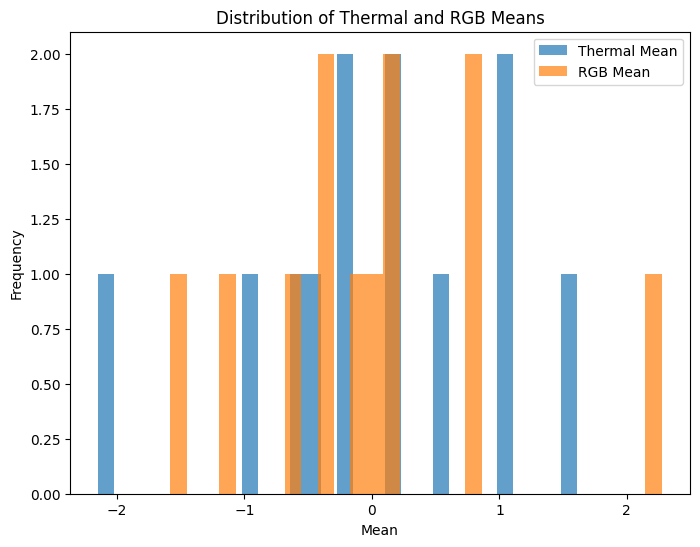

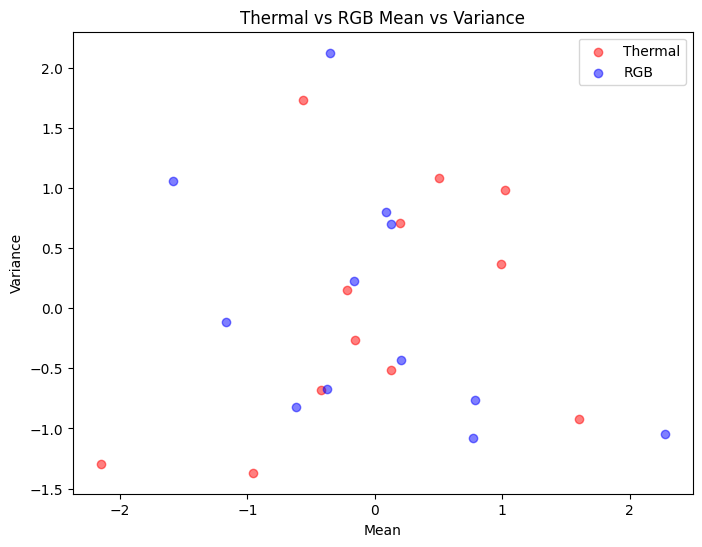

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt


le = LabelEncoder()
df['Class_Label'] = le.fit_transform(df['Class'])

X = df[['Mean', 'Variance']].values
y = df['Class_Label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


def fisher_discriminant_ratio(df):
    thermal_data = df[df['Class'] == 'Thermal']
    rgb_data = df[df['Class'] == 'RGB']

    thermal_mean = thermal_data['Mean'].mean()
    rgb_mean = rgb_data['Mean'].mean()

    thermal_var = thermal_data['Variance'].var()
    rgb_var = rgb_data['Variance'].var()

    fisher_ratio = (thermal_mean - rgb_mean) ** 2 / (thermal_var + rgb_var)
    return fisher_ratio

fdr = fisher_discriminant_ratio(df)
print(f'Fisher Discriminant Ratio: {fdr}')


def auc_score(y_test, y_pred_prob):
    auc = roc_auc_score(y_test, y_pred_prob)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    return auc

auc = auc_score(y_test, y_pred_prob)
print(f'AUC Score: {auc}')


def hypothesis_test(df):
    thermal_mean = df[df['Class'] == 'Thermal']['Mean']
    rgb_mean = df[df['Class'] == 'RGB']['Mean']

    t_stat, p_val = stats.ttest_ind(thermal_mean, rgb_mean)
    return t_stat, p_val

t_stat, p_val = hypothesis_test(df)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


plt.figure(figsize=(8, 6))
df[df['Class'] == 'Thermal']['Mean'].plot(kind='hist', alpha=0.7, label='Thermal Mean', bins=30)
df[df['Class'] == 'RGB']['Mean'].plot(kind='hist', alpha=0.7, label='RGB Mean', bins=30)
plt.legend()
plt.title("Distribution of Thermal and RGB Means")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
thermal_means = df[df['Class'] == 'Thermal']['Mean']
rgb_means = df[df['Class'] == 'RGB']['Mean']
thermal_vars = df[df['Class'] == 'Thermal']['Variance']
rgb_vars = df[df['Class'] == 'RGB']['Variance']

plt.scatter(thermal_means, thermal_vars, color='red', label='Thermal', alpha=0.5)
plt.scatter(rgb_means, rgb_vars, color='blue', label='RGB', alpha=0.5)
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.title('Thermal vs RGB Mean vs Variance')
plt.legend()
plt.show()


The results obtained reflect the performance of the classification model and the statistical analyses conducted. The Fisher Discriminant Ratio, which measures the separability between the classes (thermal and RGB images), is extremely low (4.28e-31), indicating that there is no significant difference between the classes in terms of the 'Mean' and 'Variance' features, and the model struggles to discriminate between them. The AUC (Area Under the Curve) score of 0.0625 suggests that the model performs similarly to random classification, highlighting a very poor ability to correctly classify instances. The t-statistic (2.27e-15) and p-value (0.9999999999999982) from the hypothesis test further confirm that there is no statistically significant difference in the means of the two classes, reinforcing the lack of separation between them based on the 'Mean' feature. The model's accuracy of 0.25 indicates that it correctly classifies only 25% of instances, which is low and likely due to the lack of discriminative power in the features. Finally, the confusion matrix ([[0, 4], [2, 2]]) shows that the model misclassified most samples, with no true positives, two false negatives, four false positives, and two true negatives, which further suggests that the model has not effectively learned the differences between the classes. In summary, these results indicate that the logistic regression model is not successfully distinguishing between thermal and RGB classes, likely due to the insufficient separability of the features used for training.

The reasons for the unsatisfactory results can be attributed to several factors. First, the images were captured for image fusion purposes rather than specifically for classification, which means the features distinguishing the classes (thermal and RGB images) may not be discriminative enough in terms of 'Mean' and 'Variance'. These images were not captured with the intent of training a classification model, which could impact their effectiveness for such tasks. Additionally, the small size of the dataset, with only 24 images, is extremely limited for training an effective machine learning model. Classification models, particularly linear models like logistic regression, typically require a larger amount of data to learn generalizable patterns. The limited dataset size may cause the model to overfit or fail to learn the class differences adequately. Furthermore, the images may not be well-balanced in terms of class representation, affecting the model's ability to generalize. Also, the choice of features such as 'Mean' and 'Variance' may not be sufficient to clearly distinguish between thermal and RGB images, indicating that the model lacks relevant or enough information to make accurate classifications.